In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_data =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header = None)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header = None)

In [ ]:
train_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1303,0,0,2,12,14,5,0,0,0,2,...,0,0,0,2,15,4,0,0,0,9
1214,0,0,10,16,14,6,0,0,0,0,...,0,0,0,9,14,16,11,1,0,8
1277,0,0,8,14,10,2,0,0,0,0,...,0,0,0,6,16,14,7,1,0,3
1716,0,0,9,15,1,0,0,0,0,2,...,0,0,0,7,16,15,5,2,0,2
1036,0,0,5,8,12,12,13,0,0,0,...,0,0,0,3,16,13,1,0,0,5


In [ ]:
trainY = np.array(train_data[64])
testY = np.array(test_data[64])

In [ ]:
trainX = train_data.drop([64], axis = 1)
testX = test_data.drop([64], axis = 1)

trainx = np.array(trainX)
testx = np.array(testX)

In [ ]:
print(trainX.shape)
print(testx.shape)

(3823, 64)
(1797, 64)


In [ ]:
trainy = np.array(trainY)
testy = np.array(testY)

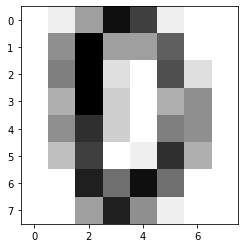

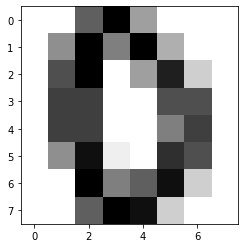

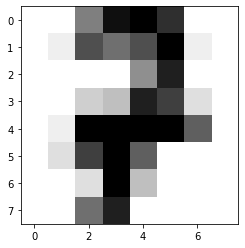

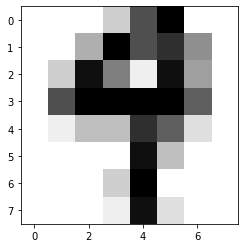

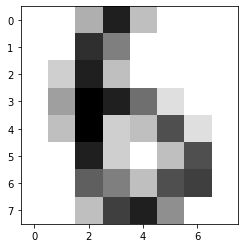

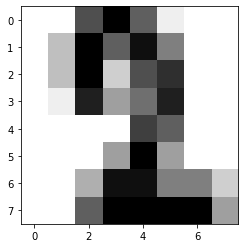

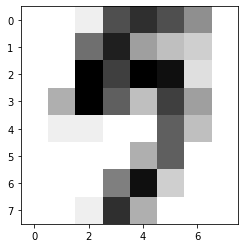

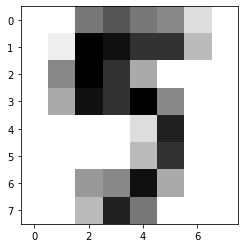

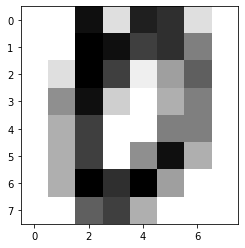

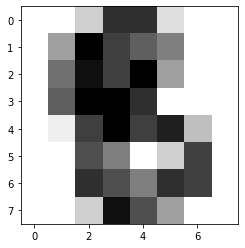

In [ ]:
for i in range(10):
    plt.imshow(trainx[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [ ]:
trainx = (trainx-trainx.min()) / (trainx.max()-trainx.min())
testx = (testx-testx.min()) / (testx.max()-testx.min())

In [ ]:
import tensorflow as tf
from tensorflow.python import keras

model = tf.keras.Sequential([
    keras.layers.Dense(64, input_shape=(trainx[0].shape), activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh, name="hidden_layer2"),
    keras.layers.Dense(32, activation=tf.nn.tanh, name="hidden_layer3"),
    keras.layers.Dense(32, activation=tf.nn.tanh, name="hidden_layer4"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', # output label is assigned integer value (0, 1, 2, 3…) vs one hot encoding
            optimizer=tf.keras.optimizers.Adam(0.00001),
             metrics=['accuracy'])

In [ ]:
history = model.fit(trainx, trainy, epochs=2000, validation_split=0.2, verbose=2)

Epoch 1/2000
96/96 - 2s - loss: 2.3827 - accuracy: 0.1131 - val_loss: 2.3823 - val_accuracy: 0.1111 - 2s/epoch - 16ms/step
Epoch 2/2000
96/96 - 0s - loss: 2.3507 - accuracy: 0.1337 - val_loss: 2.3495 - val_accuracy: 0.1268 - 257ms/epoch - 3ms/step
Epoch 3/2000
96/96 - 0s - loss: 2.3200 - accuracy: 0.1511 - val_loss: 2.3184 - val_accuracy: 0.1438 - 223ms/epoch - 2ms/step
Epoch 4/2000
96/96 - 0s - loss: 2.2909 - accuracy: 0.1700 - val_loss: 2.2886 - val_accuracy: 0.1634 - 248ms/epoch - 3ms/step
Epoch 5/2000
96/96 - 0s - loss: 2.2626 - accuracy: 0.1900 - val_loss: 2.2599 - val_accuracy: 0.1882 - 269ms/epoch - 3ms/step
Epoch 6/2000
96/96 - 0s - loss: 2.2350 - accuracy: 0.2083 - val_loss: 2.2320 - val_accuracy: 0.1987 - 219ms/epoch - 2ms/step
Epoch 7/2000
96/96 - 0s - loss: 2.2079 - accuracy: 0.2335 - val_loss: 2.2049 - val_accuracy: 0.2183 - 218ms/epoch - 2ms/step
Epoch 8/2000
96/96 - 0s - loss: 2.1813 - accuracy: 0.2554 - val_loss: 2.1781 - val_accuracy: 0.2484 - 273ms/epoch - 3ms/step
Ep

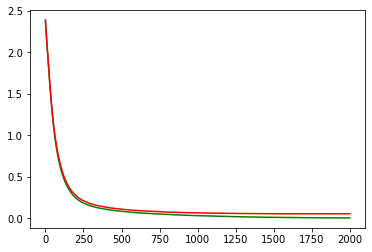

In [ ]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

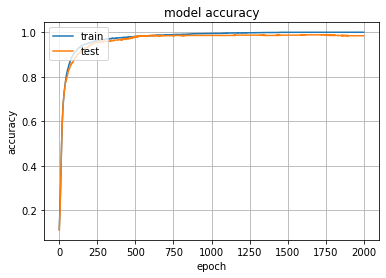

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(testx,testy)
print(accuracy*100)

57/57 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9666
96.66110277175903


In [ ]:
unique, counts = np.unique(trainY, return_counts=True)

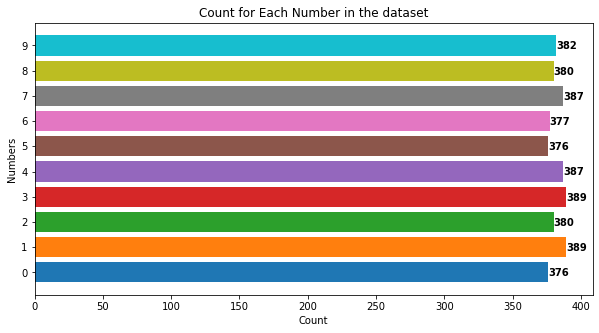

In [ ]:
import seaborn as sns
colors = sns.color_palette(None, 10) # 10 random colors
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(unique, counts, color=colors)
plt.title('Count for Each Number in the dataset')
plt.xlabel('Count')
plt.ylabel('Numbers')
plt.yticks(unique)
for i, v in enumerate(counts):
    ax.text(v, i-0.15, str(v), fontweight='bold')
plt.show()

In [ ]:
predictions=model.predict(testx[0:100])

4/4 [==============================] - 0s 3ms/step


In [ ]:
predictions[0]

array([9.9993092e-01, 1.0427579e-09, 1.7498927e-06, 7.5254263e-07,
       6.7956071e-06, 9.6552822e-06, 9.5112673e-06, 9.3418254e-07,
       2.9136661e-05, 1.0506237e-05], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

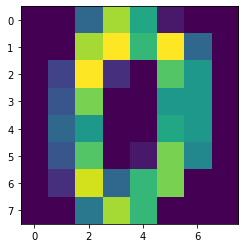

In [ ]:
plt.imshow(testx[0].reshape(8,8))

In [ ]:
np.argmax(predictions,axis=1)

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 5, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 1, 0, 0, 1, 7, 6, 3, 2, 1, 7, 1,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [ ]:
testy[0:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [ ]:
np.argmax(predictions,axis=1) ==testy[0:100]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
np.mean(np.argmax(predictions,axis=1) ==testy[0:100])

0.96

In [ ]:
wrong = np.argmin(np.argmax(predictions,axis=1) == testy[0:100])
print(wrong)

5


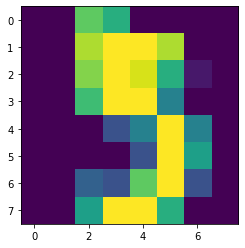

label for  5 : 5
prediction for it :  9


In [ ]:
plt.imshow(testx[wrong].reshape(8,8))
plt.show()
print("label for ",wrong,":",testy[wrong])
print("prediction for it : ",np.argmax(predictions[wrong]))